In [75]:
import pandas as pd
import seaborn as sns
import numpy as np

In [76]:
df = pd.read_csv('Inventory.csv')

SIMPLE EXPLOR

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28328 entries, 0 to 28327
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BALANCE_AS_OF_DATE  28328 non-null  object
 1   PLANT_NAME          28328 non-null  object
 2   MATERIAL_NAME       28328 non-null  object
 3   BATCH_NUMBER        28327 non-null  object
 4   UNRESRICTED_STOCK   28328 non-null  int64 
 5   STOCK_UNIT          28328 non-null  object
 6   STOCK_SELL_VALUE    28328 non-null  int64 
 7   CURRENCY            28328 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


In [78]:
print(df.isnull().sum())

BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          1
UNRESRICTED_STOCK     0
STOCK_UNIT            0
STOCK_SELL_VALUE      0
CURRENCY              0
dtype: int64


In [79]:
print(df[df['BATCH_NUMBER'].isnull()])

      BALANCE_AS_OF_DATE           PLANT_NAME MATERIAL_NAME BATCH_NUMBER  \
24591          9/30/2024  SINGAPORE-WAREHOUSE      MAT-0132          NaN   

       UNRESRICTED_STOCK STOCK_UNIT  STOCK_SELL_VALUE CURRENCY  
24591                119         KG              2115      SGD  


In [80]:
df.iloc[24589:24595]

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
24589,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0057,S9712B,16075,KG,17040,SGD
24590,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD
24591,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0132,NaN,119,KG,2115,SGD
24592,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,2148A5714,8250,KG,5775,SGD
24593,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,5765A3467,41250,KG,28875,SGD
24594,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,5873A2025,89375,KG,62563,SGD


In [81]:
df.drop([24591],inplace=True)

In [82]:
df.iloc[24589:24595]

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
24589,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0057,S9712B,16075,KG,17040,SGD
24590,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD
24592,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,2148A5714,8250,KG,5775,SGD
24593,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,5765A3467,41250,KG,28875,SGD
24594,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,5873A2025,89375,KG,62563,SGD
24595,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0024,6757A3049,66000,KG,46200,SGD


In [83]:
any(df.duplicated())

True

In [84]:
max(df[(df.duplicated(keep=False))].value_counts())

2

In [85]:
df.drop_duplicates(inplace=True)

In [105]:
df.columns

Index(['BALANCE_AS_OF_DATE', 'PLANT_NAME', 'MATERIAL_NAME', 'BATCH_NUMBER',
       'UNRESRICTED_STOCK', 'STOCK_UNIT', 'STOCK_SELL_VALUE', 'CURRENCY',
       'dolla', 'IS_HOLIDAY'],
      dtype='object')

In [86]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-'*50)

BALANCE_AS_OF_DATE
['12/31/2023' '1/31/2024' '2/29/2024' '3/31/2024' '4/30/2024' '5/31/2024'
 '6/30/2024' '7/31/2024' '8/31/2024' '9/30/2024' '10/31/2024' '11/30/2024'
 '12/31/2024']
--------------------------------------------------
PLANT_NAME
['CHINA-WAREHOUSE' 'SINGAPORE-WAREHOUSE']
--------------------------------------------------
MATERIAL_NAME
['MAT-0045' 'MAT-0193' 'MAT-0311' 'MAT-0374' 'MAT-0046' 'MAT-0194'
 'MAT-0257' 'MAT-0195' 'MAT-0082' 'MAT-0196' 'MAT-0047' 'MAT-0094'
 'MAT-0258' 'MAT-0259' 'MAT-0098' 'MAT-0099' 'MAT-0375' 'MAT-0376'
 'MAT-0312' 'MAT-0233' 'MAT-0377' 'MAT-0197' 'MAT-0198' 'MAT-0100'
 'MAT-0095' 'MAT-0260' 'MAT-0204' 'MAT-0052' 'MAT-0412' 'MAT-0261'
 'MAT-0141' 'MAT-0313' 'MAT-0199' 'MAT-0200' 'MAT-0142' 'MAT-0143'
 'MAT-0314' 'MAT-0144' 'MAT-0145' 'MAT-0001' 'MAT-0201' 'MAT-0262'
 'MAT-0319' 'MAT-0048' 'MAT-0205' 'MAT-0176' 'MAT-0096' 'MAT-0315'
 'MAT-0146' 'MAT-0049' 'MAT-0013' 'MAT-0147' 'MAT-0003' 'MAT-0004'
 'MAT-0320' 'MAT-0321' 'MAT-0382' 'MAT-0053' 

#####UNRESRICTED_STOCK

Delete outlier

<Axes: ylabel='UNRESRICTED_STOCK'>

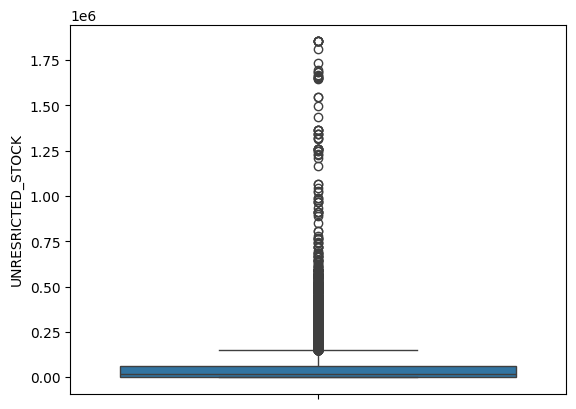

In [87]:
#before
sns.boxplot(df['UNRESRICTED_STOCK'])

In [88]:
def find_iqr(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return (upper_bound,lower_bound)

In [89]:
df_no_outlier = df[~((df['UNRESRICTED_STOCK'] <= find_iqr('UNRESRICTED_STOCK')[1]) | (df['UNRESRICTED_STOCK'] >= find_iqr('UNRESRICTED_STOCK')[0]) | (df['UNRESRICTED_STOCK'] >= 122_000))]

<Axes: xlabel='UNRESRICTED_STOCK'>

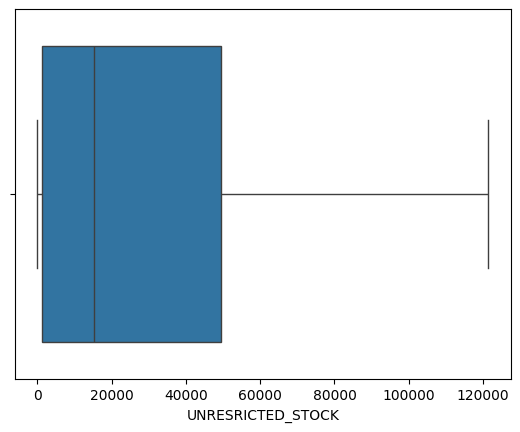

In [90]:
sns.boxplot(x=df_no_outlier['UNRESRICTED_STOCK'])

<Axes: xlabel='STOCK_SELL_VALUE'>

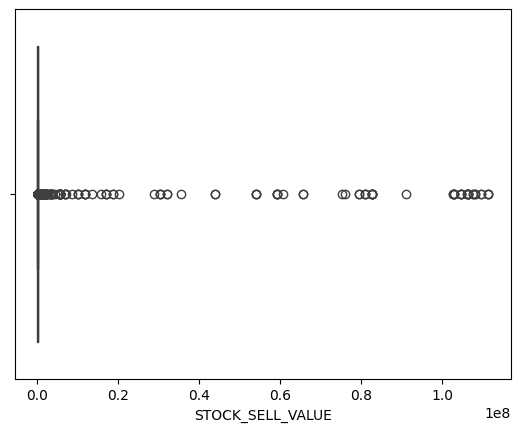

In [91]:
sns.boxplot(x=df_no_outlier['STOCK_SELL_VALUE'])

<Axes: xlabel='STOCK_SELL_VALUE'>

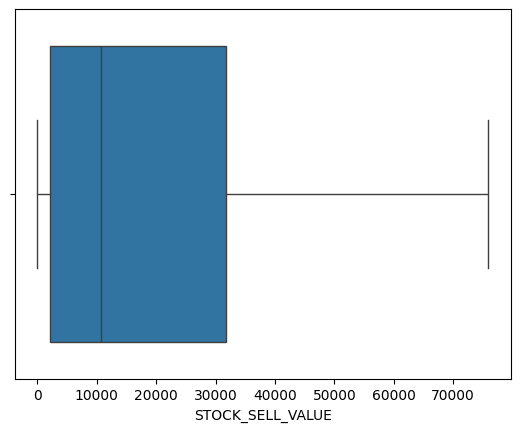

In [92]:
df_no_outlier_ = df_no_outlier[~((df_no_outlier['STOCK_SELL_VALUE'] <= find_iqr('STOCK_SELL_VALUE')[1]) | (df_no_outlier['STOCK_SELL_VALUE'] >= find_iqr('STOCK_SELL_VALUE')[0]) 
                      |(df_no_outlier['STOCK_SELL_VALUE'] >75_940) | (df_no_outlier['STOCK_SELL_VALUE'] == 0))]
sns.boxplot(x=df_no_outlier_['STOCK_SELL_VALUE'])

In [93]:
(100*len(df_no_outlier_ ))/ len(df) #after delete outlier 

65.92885089117519

In [94]:
df.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY


In [95]:
df['dolla'] = df.apply(
    lambda row: round(row['STOCK_SELL_VALUE'] * 0.14,2) if row['CURRENCY'] == 'CNY' else round(row['STOCK_SELL_VALUE'] / 7.85,2),
    axis=1
)


Write down to CSV

In [102]:
df_outlier = df[((df['UNRESRICTED_STOCK'] <= find_iqr('UNRESRICTED_STOCK')[1]) | (df['UNRESRICTED_STOCK'] >= find_iqr('UNRESRICTED_STOCK')[0]) | (df['UNRESRICTED_STOCK'] >= 122_000))]
df_outlier_ =  df_no_outlier[((df_no_outlier['STOCK_SELL_VALUE'] <= find_iqr('STOCK_SELL_VALUE')[1]) | (df_no_outlier['STOCK_SELL_VALUE'] >= find_iqr('STOCK_SELL_VALUE')[0]) 
                      |(df_no_outlier['STOCK_SELL_VALUE'] >75_940) | (df_no_outlier['STOCK_SELL_VALUE'] == 0))]

we_are_outlier = pd.concat([df_outlier,df_outlier_ ],axis=0)

In [103]:
#we_are_outlier.to_csv('inventory_outlier', index=False,)

In [104]:
#df_no_outlier_.to_csv('inventory_perfect', index=False)